In [1]:
params = {#"figure.figsize": (12,9),
          "font.size": 15,
          "font.weight": "normal",
          "xtick.major.size": 6,
          "xtick.minor.size": 4,
          "ytick.major.size": 6,
          "ytick.minor.size": 4,
          "xtick.major.width": 3,
          "xtick.minor.width": 2,
          "ytick.major.width": 3,
          "ytick.minor.width": 2,
          "xtick.major.pad": 5,
          "xtick.minor.pad": 5,
          "ytick.major.pad": 5,
          "ytick.minor.pad": 5,
          "lines.linewidth": 2,
          "lines.markersize": 15,
          "axes.linewidth": 2,
          "axes.labelsize": 20,  
    
          "image.cmap": "viridis",
          "legend.loc": "best",
          #"text.usetex": False,    
          "xtick.labelsize" : 15,
          "ytick.labelsize" : 15,
          "savefig.dpi" : 1000,
        'legend.markerscale': 1.0
          }
import matplotlib
matplotlib.rcParams.update(params)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.lines import Line2D

import lightkurve as lk
import eleanor

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
from astropy.visualization.wcsaxes import SphericalCircle


import pandas as pd
import glob
import numpy as np



In [2]:
%matplotlib notebook

In [3]:
def dateLabels(ax):
    """
    Small function to create a top x-axis on light curve plots with dates in iso format (2018-10-09).
    Takes the current axis and generates a new identical one. Generates new labels at the same tick positions as those set
    automatically by matplotlib using astropy Time. Set the new axes ticks & labels to these values,
    ensuring the same xlimits kept

    """
    ax2 = ax.twiny()

    ticks = ax.get_xticks()
    labels = Time(ticks, format='mjd').to_value('iso',subfmt='date')

    ax2.set_xticks(ticks)
    ax2.set_xticklabels(labels, size=12)
    ax2.set_xlim(ax.get_xlim())
    
    return ax2

<IPython.core.display.Javascript object>


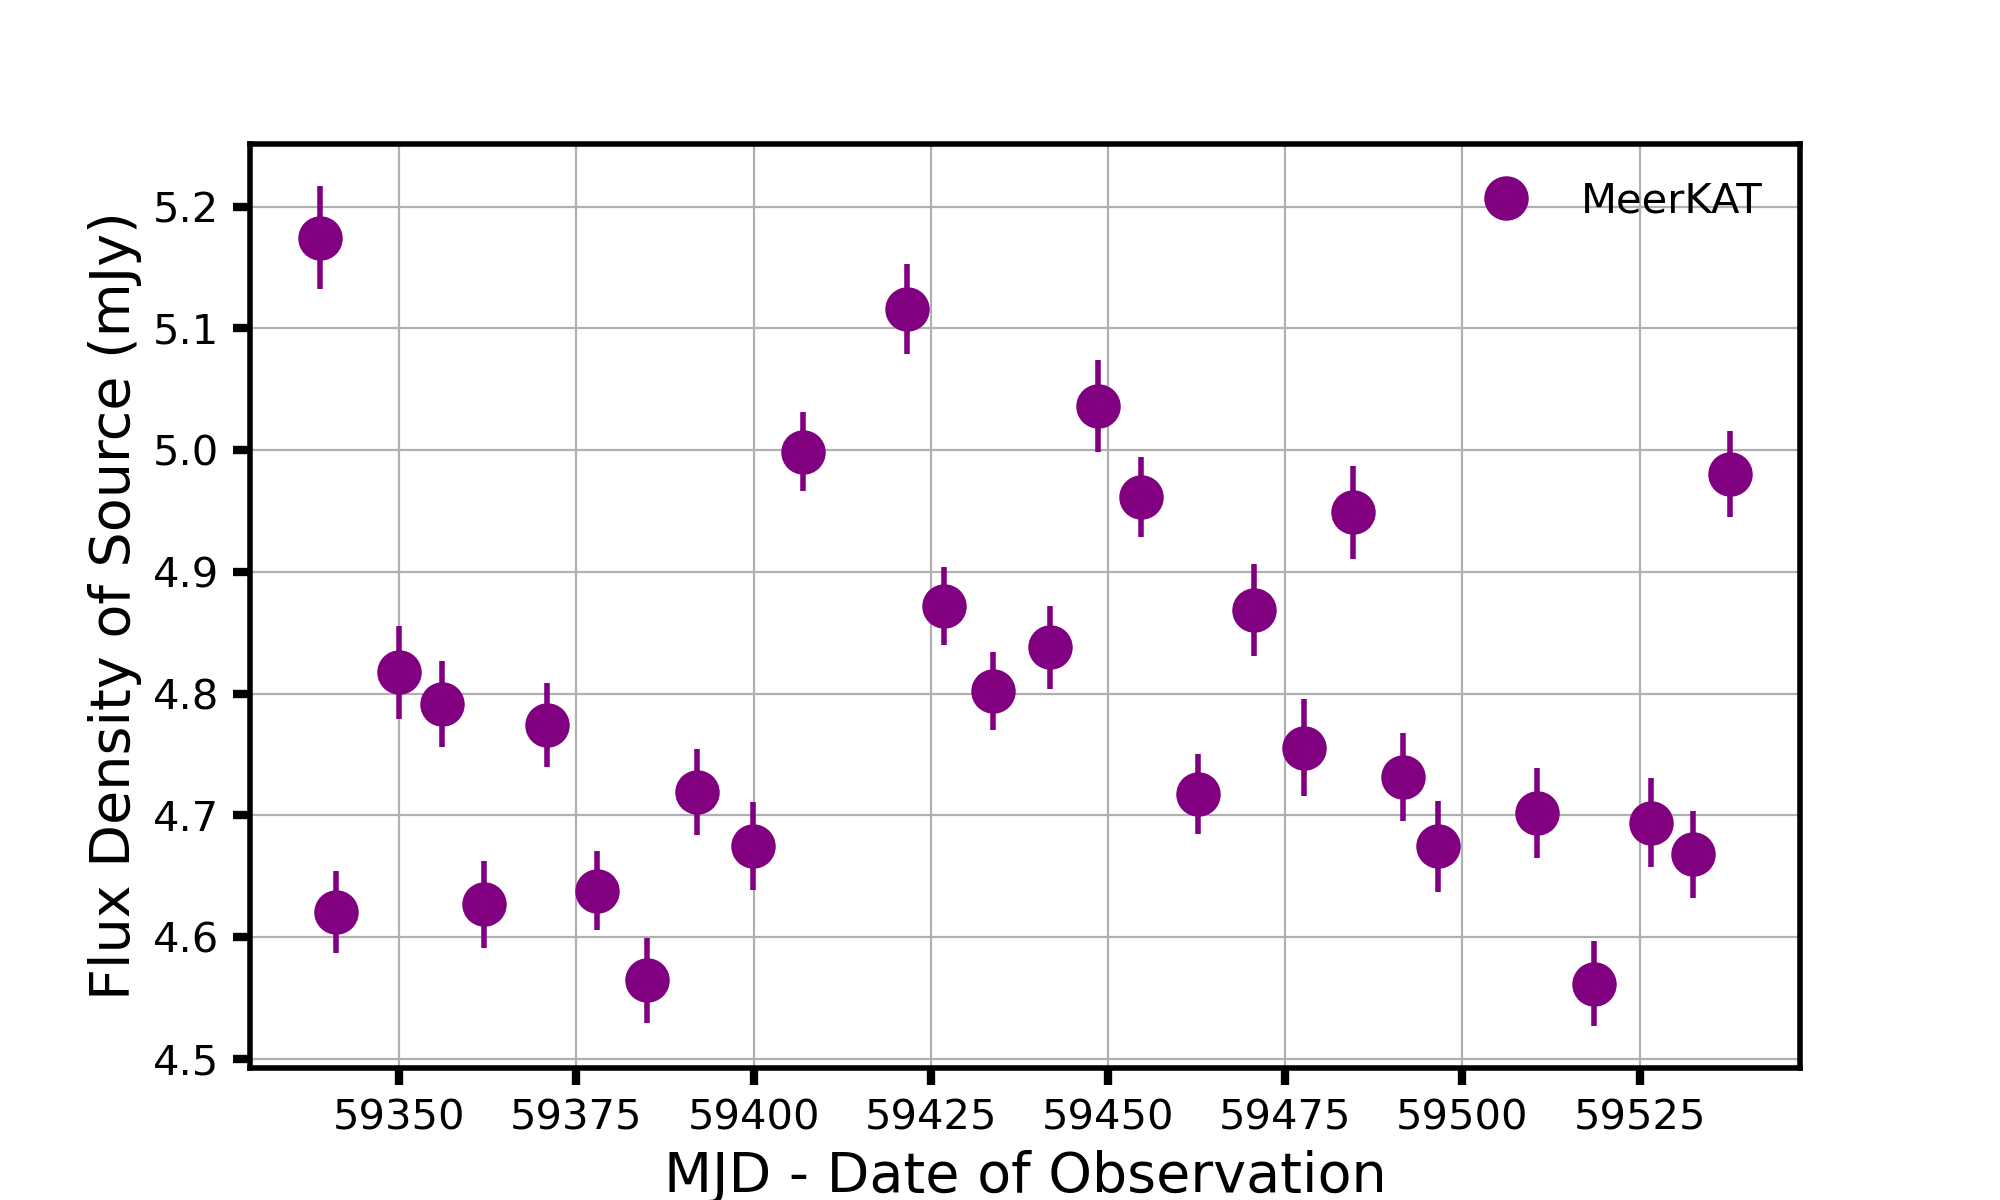

<IPython.core.display.Javascript object>


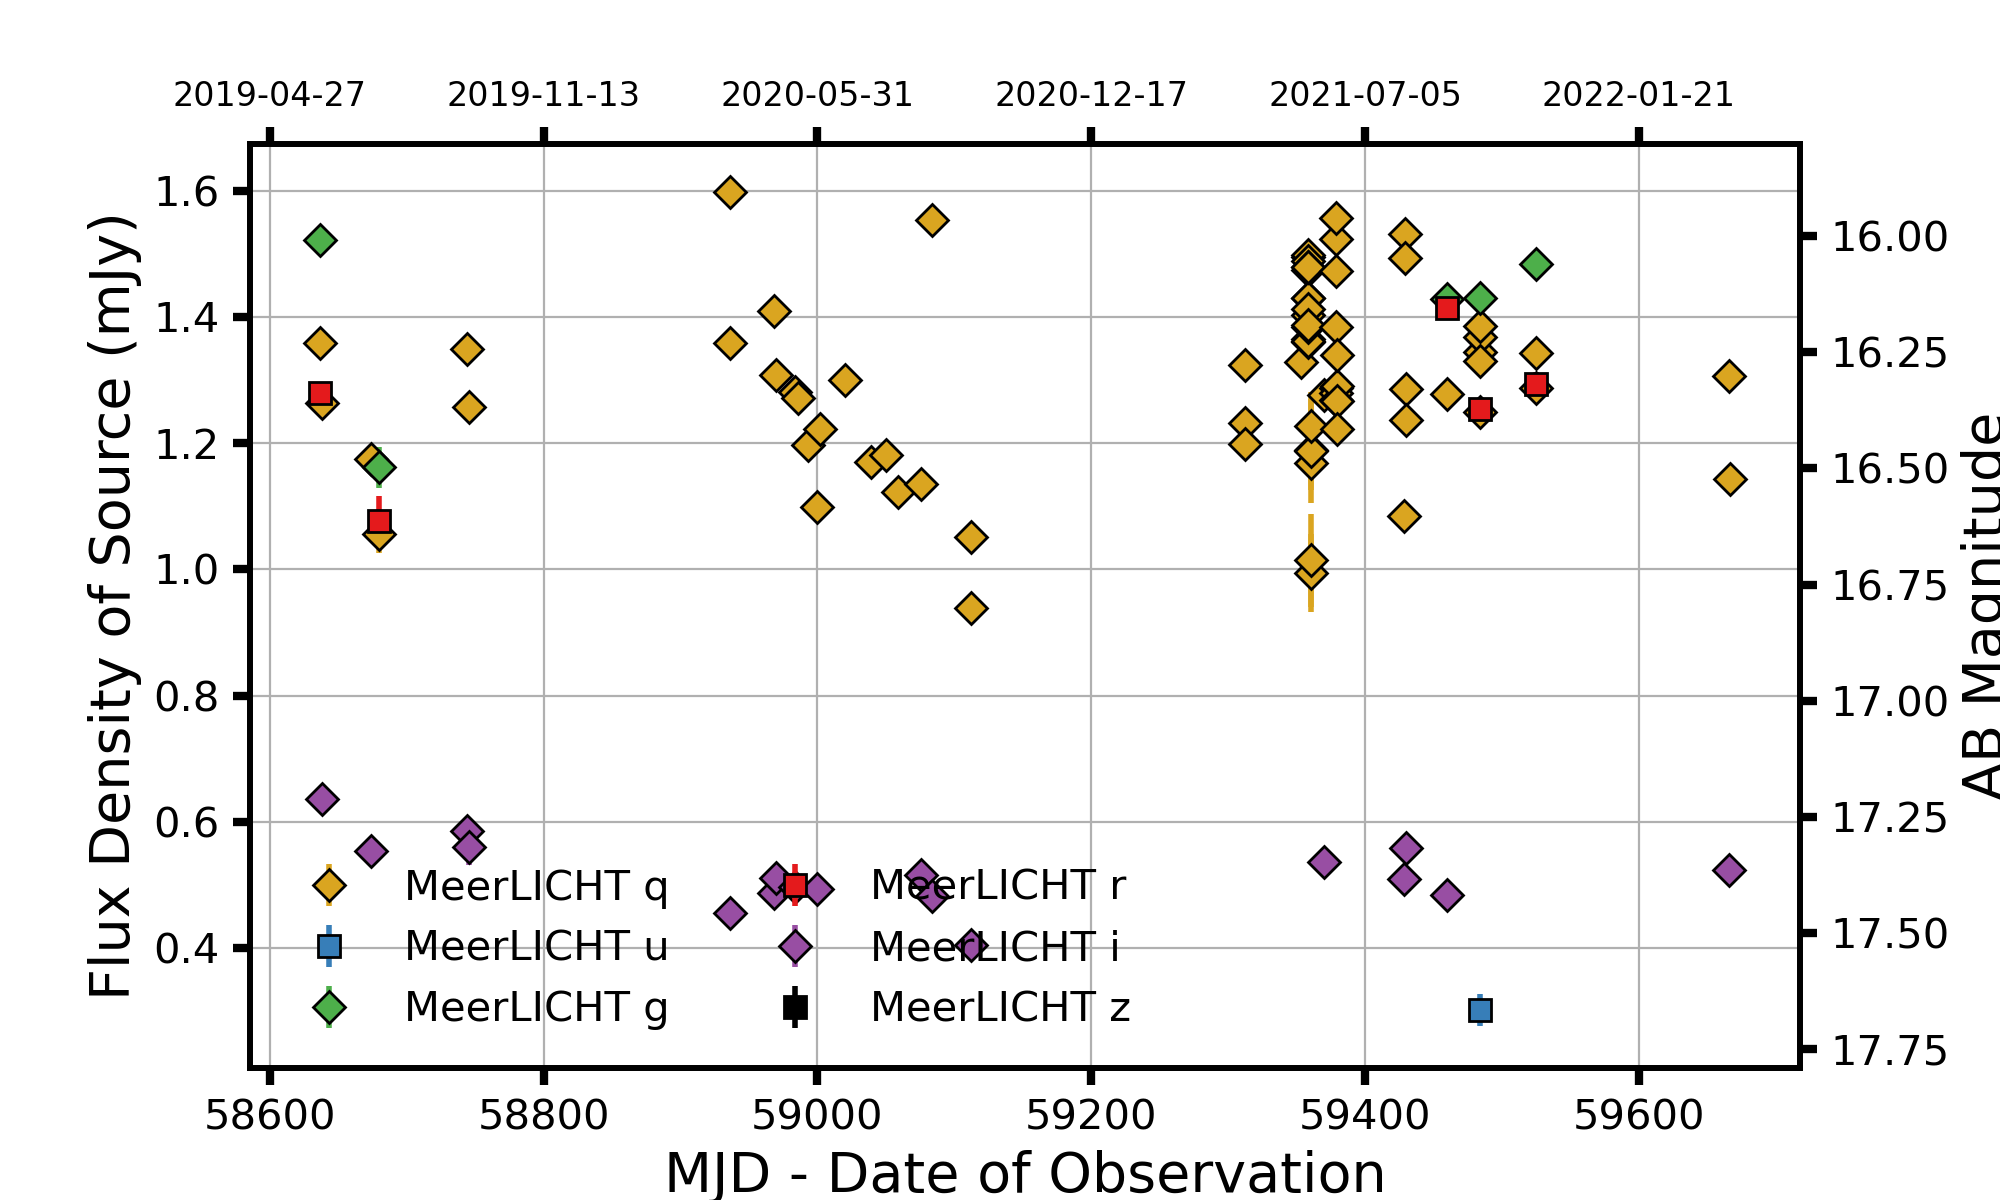

<IPython.core.display.Javascript object>


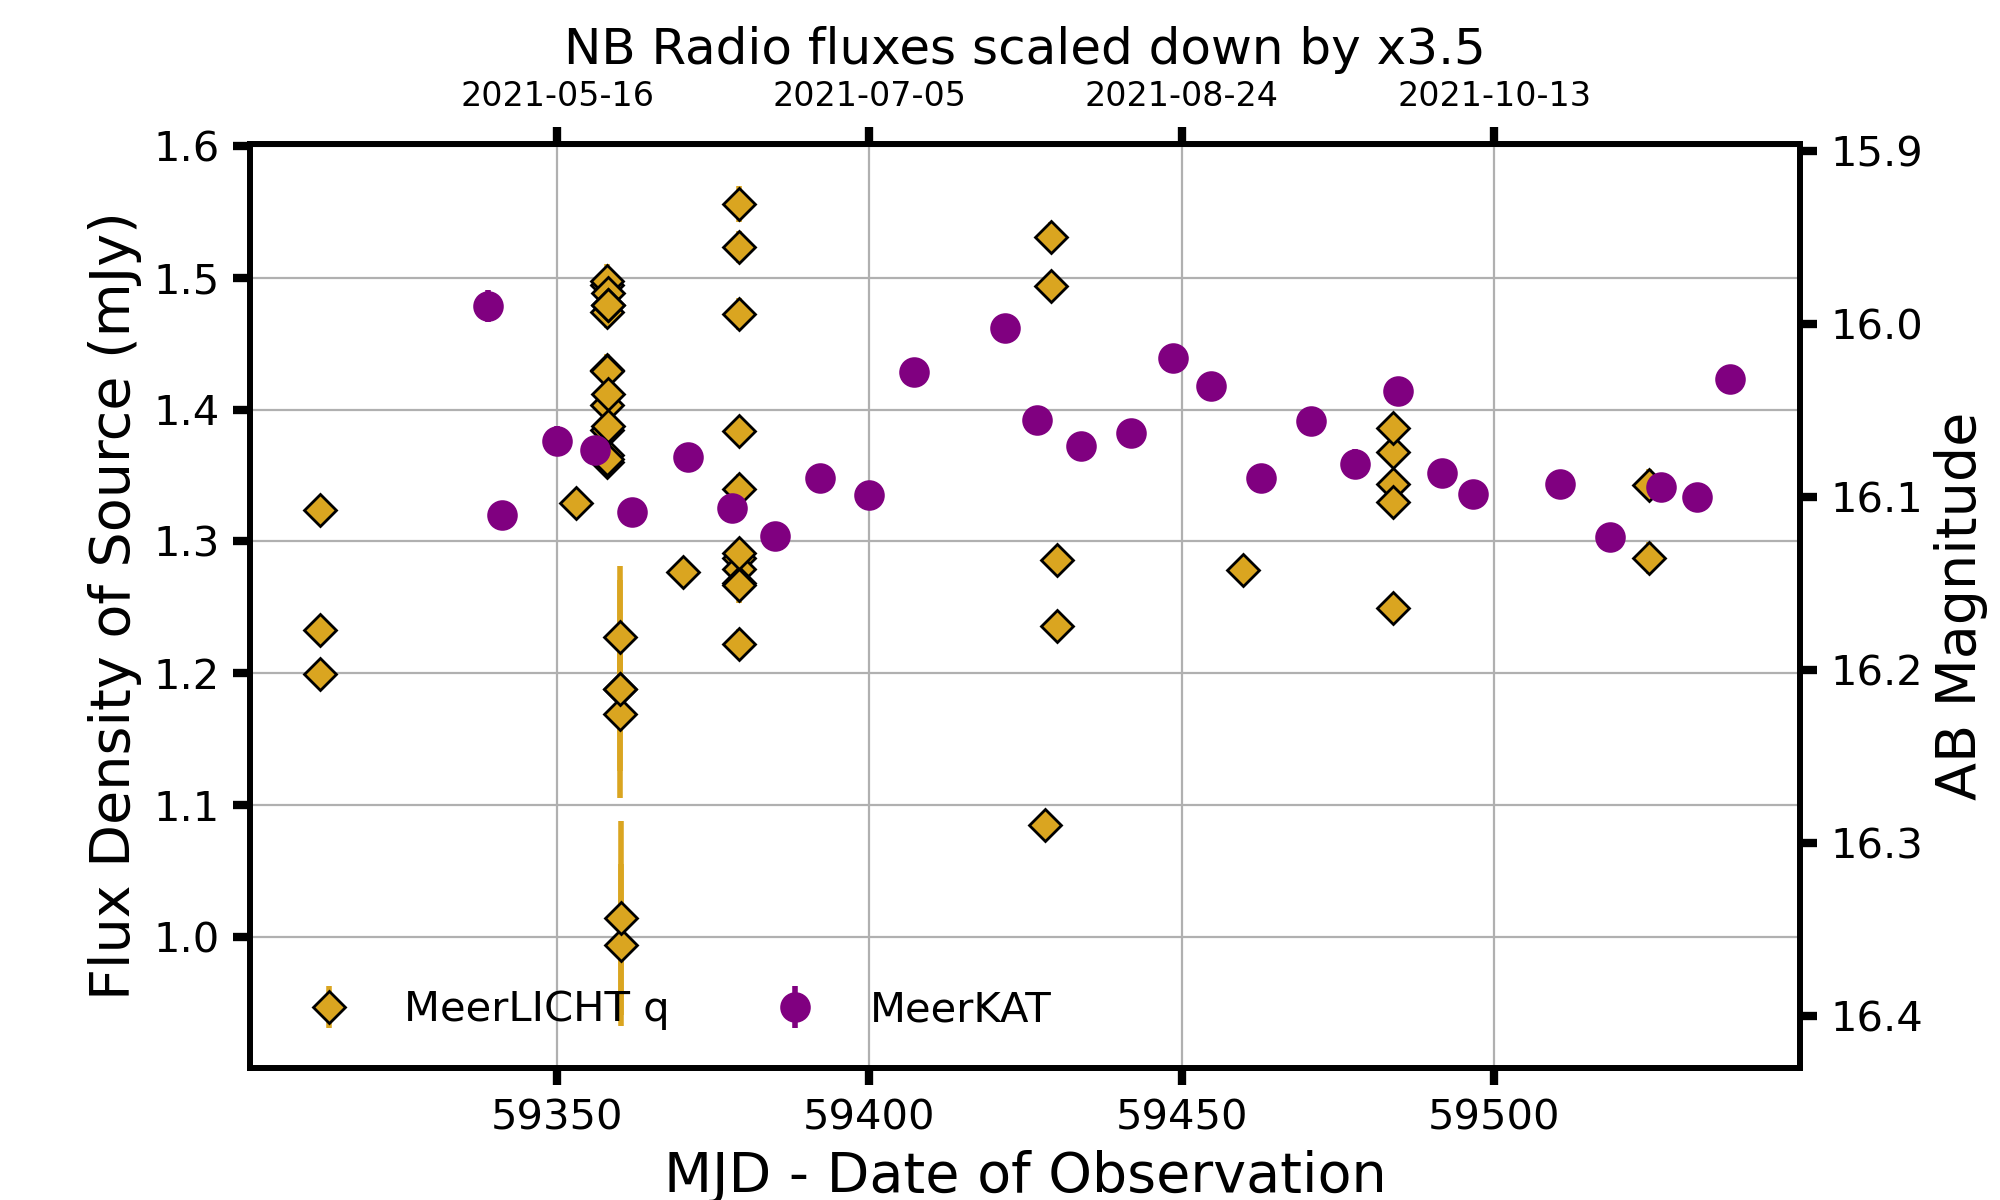

In [5]:
RadLC = pd.read_csv('408_ra270.580_dec-30.240_MAXIJ1803TraPDB_andersson.csv')
plt.figure(figsize=(10,6))
plt.tight_layout()
ax=plt.gca()
ms=8
plt.errorbar(RadLC['mjd'], RadLC['f_int']*1000, yerr=RadLC['f_int_err']*1000,
             marker='o', ls='none', color = 'purple', label='MeerKAT')

plt.xlabel('MJD - Date of Observation')
plt.ylabel('Flux Density of Source (mJy)')
plt.grid(True)
plt.legend(ncol=2, framealpha=0)
plt.show()

MLLC = pd.read_csv('MLT_PN_LC.csv')
MLLC['flux(mJy)'] = MLLC['Flux [μJy]']*1e-3
MLLC['flux_err'] = MLLC['Fluxerr [μJy]']*1e-3
MLq = MLLC.loc[MLLC['Filter']=='q']
MLu = MLLC.loc[MLLC['Filter']=='u']
MLg = MLLC.loc[MLLC['Filter']=='g']
MLr = MLLC.loc[MLLC['Filter']=='r']
MLi = MLLC.loc[MLLC['Filter']=='i']
MLz = MLLC.loc[MLLC['Filter']=='z']

plt.figure(figsize=(10,6))
plt.tight_layout()
ax=plt.gca()
ms=8
plt.errorbar(MLq['MJD'], MLq['flux(mJy)'], yerr= MLq['flux_err'], marker='D', ls='none', 
             c='goldenrod', mec='black', markersize=ms, label='MeerLICHT q')
plt.errorbar(MLu['MJD'], MLu['flux(mJy)'], yerr= MLu['flux_err'], marker='s', ls='none', 
             c='#377eb8', mec='black', markersize=ms, label='MeerLICHT u')
plt.errorbar(MLg['MJD'], MLg['flux(mJy)'], yerr= MLg['flux_err'], marker='D', ls='none', 
             c='#4daf4a', mec='black', markersize=ms, label='MeerLICHT g')
plt.errorbar(MLr['MJD'], MLr['flux(mJy)'], yerr= MLr['flux_err'], marker='s', ls='none', 
             c='#e41a1c', mec='black', markersize=ms, label='MeerLICHT r')
plt.errorbar(MLi['MJD'], MLi['flux(mJy)'], yerr= MLi['flux_err'], marker='D', ls='none', 
             c='#984ea3',mec='black', markersize=ms, label='MeerLICHT i')
plt.errorbar(MLz['MJD'], MLz['flux(mJy)'], yerr= MLz['flux_err'], marker='s', ls='none', 
             c='black', mec='black', markersize=ms, label='MeerLICHT z')


#plot all optical
plt.xlabel('MJD - Date of Observation')
plt.ylabel('Flux Density of Source (mJy)')
plt.grid(True)
plt.legend(ncol=2, framealpha=0, loc='lower left')
dateLabels(ax)
#note we also make a 'dummy', invisible plot just to get a second y-scale in Magnitudes
Magax = ax.twinx()
Magax.invert_yaxis()
Magax.set_ylabel('AB Magnitude')
Magax.scatter(MLLC['MJD'], MLLC['Mag_Opt'], alpha=0.0)
plt.show()

#plot contemporaneous q and radio

MLqt = MLq[59300 < MLq['MJD']]
MLqt = MLqt[MLqt['MJD'] < 59600]

plt.figure(figsize=(10,6))
plt.tight_layout()
ax=plt.gca()
ms=8
plt.errorbar(MLqt['MJD'], MLqt['flux(mJy)'], yerr= MLqt['flux_err'], marker='D', ls='none', 
             c='goldenrod', mec='black', markersize=ms, label='MeerLICHT q')

plt.errorbar(RadLC['mjd'], RadLC['f_int']*1000/3.5, yerr=RadLC['f_int_err']*1000/3.5,
             marker='o', ls='none', color = 'purple', label='MeerKAT', markersize=10)
plt.title('NB Radio fluxes scaled down by x3.5')
plt.xlabel('MJD - Date of Observation')
plt.ylabel('Flux Density of Source (mJy)')
plt.grid(True)
plt.legend(ncol=2, framealpha=0)
#ax.set_ylim(59300,59500)

dateLabels(ax)
#note we also make a 'dummy', invisible plot just to get a second y-scale in Magnitudes
Magax = ax.twinx()
Magax.invert_yaxis()
Magax.set_ylabel('AB Magnitude')
Magax.scatter(MLqt['MJD'], MLqt['Mag_Opt'], alpha=0.0)
plt.show()


In [72]:
'''def findMinDiff(arr, n):
    # Initialize difference as infinite
    diff = 10**20
     
    # Find the min diff by comparing difference
    # of all possible pairs in given array
    for i in range(n-1):
        for j in range(i+1,n):
            if abs(arr[i]-arr[j]) < diff:
                diff = abs(arr[i] - arr[j])
 
    # Return min diff
    return diff
 
# Driver code
arr = RadLC['mjd']
n = len(arr)
print("Minimum difference is " + str(findMinDiff(arr, n)))
'''
RadLC
#print((RadLC['f_int'][0] - RadLC['f_int'][1])*1000)
#print(2.22017708333442)

0.5536519190345001


3.57627480676276 1 / d 0.27962057001575863 d


<IPython.core.display.Javascript object>


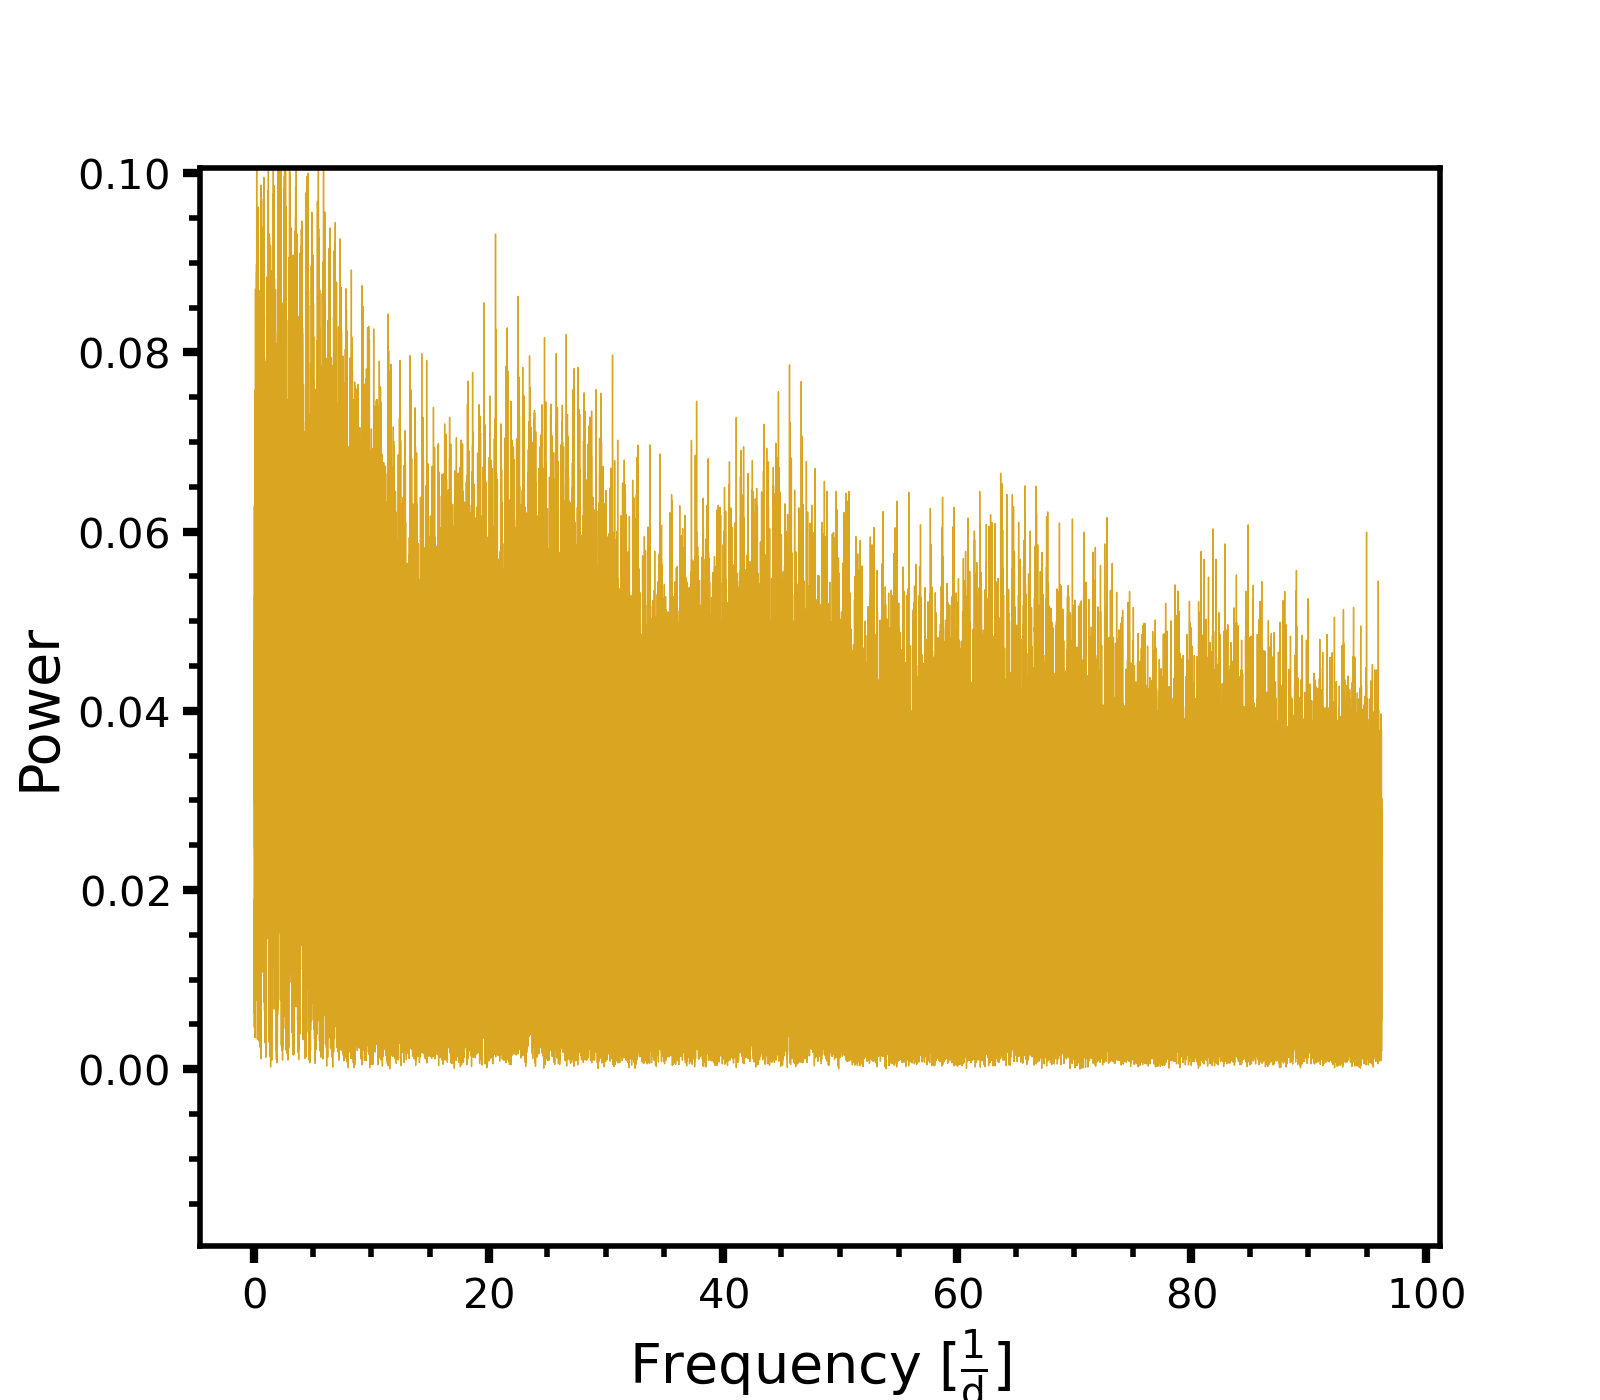

<IPython.core.display.Javascript object>


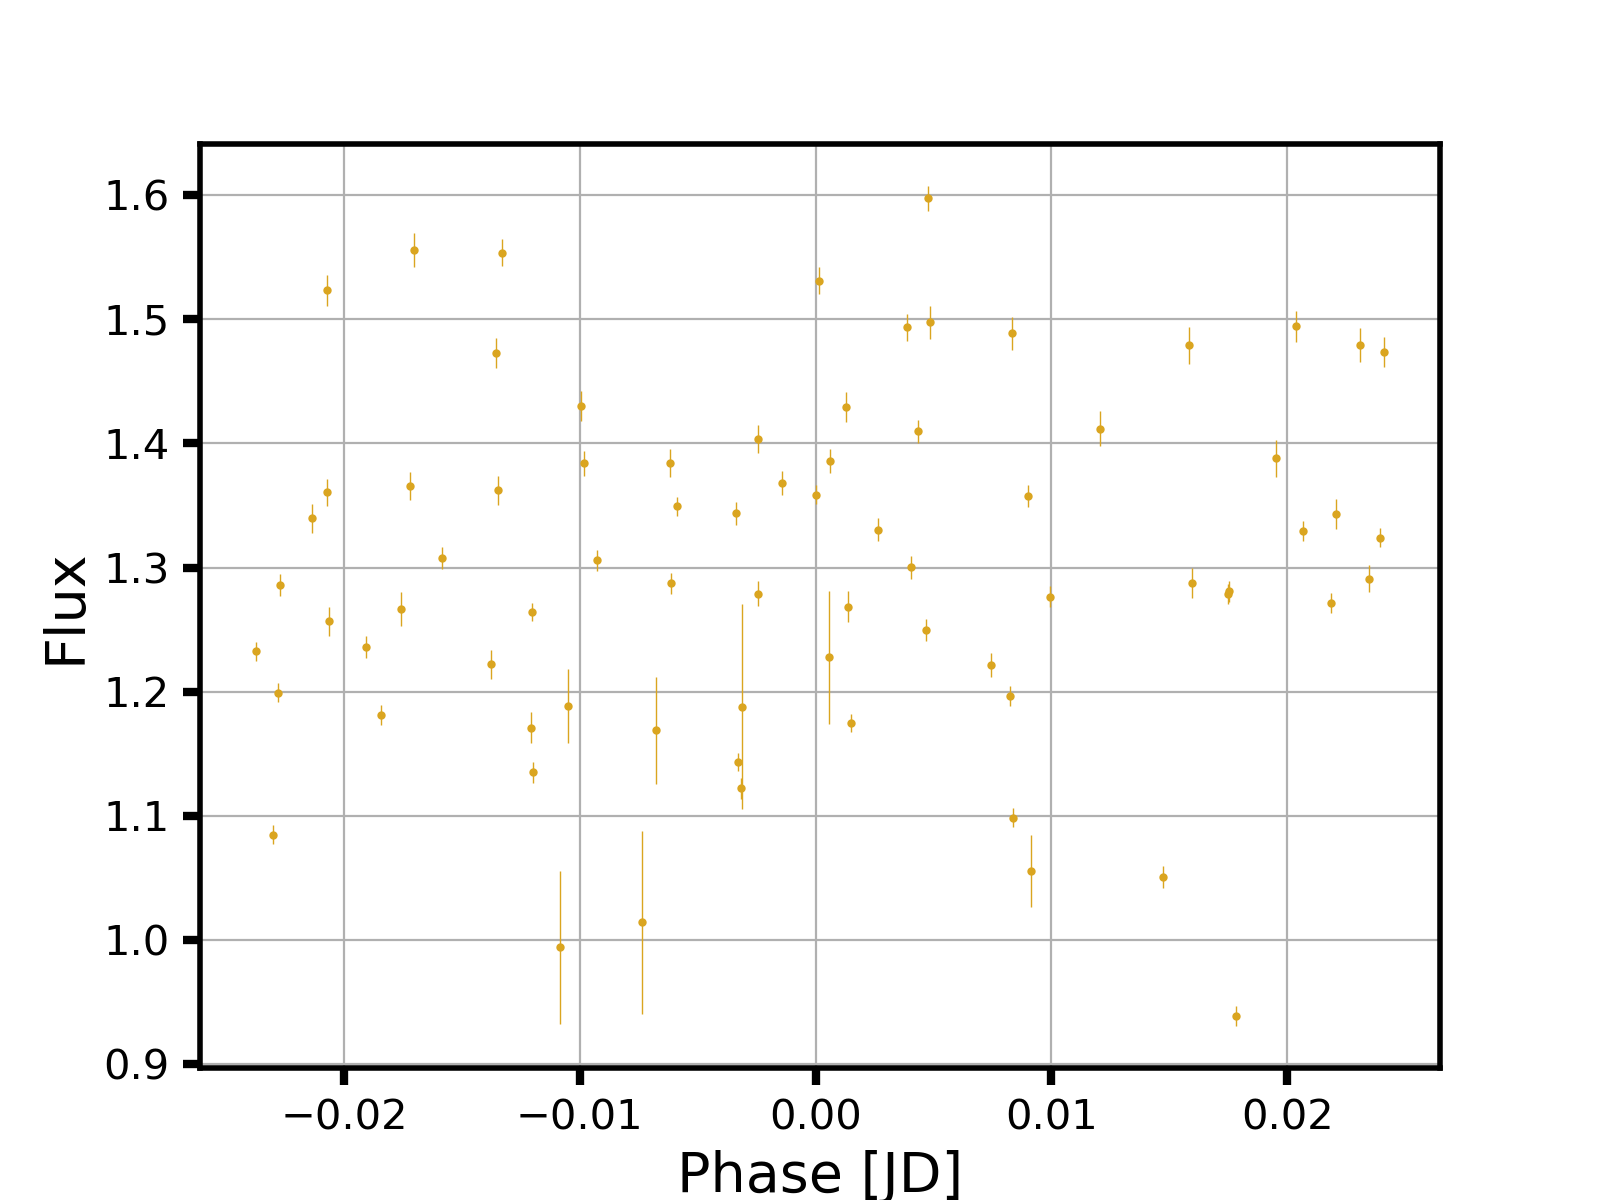

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

In [30]:
#periodogram
#optical:
time    = MLq['MJD']
flux    = MLq['flux(mJy)']
flux_err = MLq['flux_err']
lc = lk.lightcurve.LightCurve(time = time, flux = flux, flux_err=flux_err)
pg = lc.normalize().to_periodogram()
f,p,P = pg.frequency_at_max_power ,pg.max_power,pg.period_at_max_power
print(f,P)

fig, axpg = plt.subplots(figsize=(8,7))
pg.plot(ax=axpg, color='goldenrod')

#radio:
tR = RadLC['mjd']
fR = RadLC['f_int']*1000

lcR =lk.lightcurve.LightCurve(time = tR, flux = fR)
pgR = lcR.normalize(unit='ppm').to_periodogram()
frR,pR,PR = pgR.frequency_at_max_power ,pgR.max_power,pgR.period_at_max_power
#print(frR,pR,PR)

#fig, axpg = plt.subplots(figsize=(8,5))
#pgR.plot(ax=axpg, color='purple')


plc = lc.fold(period=1/20.6)#pg.period_at_max_power)
plt.figure(figsize=(8,6))
axpc=plt.gca()           
plt.grid(True)
plc.errorbar(ax=axpc, color='goldenrod', ms=2, marker='o')

In [126]:
#min brightness temp with no assumption on size i.e. emitting size from variability timescale:
c = 3e8 #m/s
nu = 1.28e9 #~1.3 GHz
pc_to_m = 3.086e+18 *1e-2
jy_to_erg = 1e-23

dist = 2670*pc_to_m

Lr = (0.0047975298615820245*jy_to_erg)*4*np.pi*dist**2 
print(Lr*1e-15, 'x10^15 erg/s/Hz')
dL = (RadLC['f_int'][0] - RadLC['f_int'][1]) * jy_to_erg *4*np.pi*dist**2
tau = 2.22017708333442*86400 #days to seconds

 
print('max size of emitting region: ',tau*c/1e13 , 'x10^13 m')

def TBmin(dL, nu, tau):
    #from Pietka, Fender and Keane 2015, Tb_min = Delta L / 8pi*k_b*nu^2*tau^2
    return dL / (8*np.pi*1.3806e-23*nu**2 * tau**2)

#print(TBmin(dL15, nu, tau15)*1e-7, 'x10^7 K')
print('Variation of 0.48 mJy over 2.2 days gives us a MINIMUM brightness temp of:')
print(TBmin(dL,nu,tau)*1e-7, 'x10^7 K')


4.0930016227450245 x10^15 erg/s/Hz
max size of emitting region:  5.754699000002816 x10^13 m
Variation of 0.48 mJy over 2.2 days gives us a MINIMUM brightness temp of:
2.258034929250194 x10^7 K


In [6]:
import astropy

0.99e7 - 1.5e8

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: erfa version 1.7 or later must be installed to use Astropy. erfa is not installed.